In [31]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
from datetime import datetime, timedelta

[*********************100%***********************]  1 of 1 completed


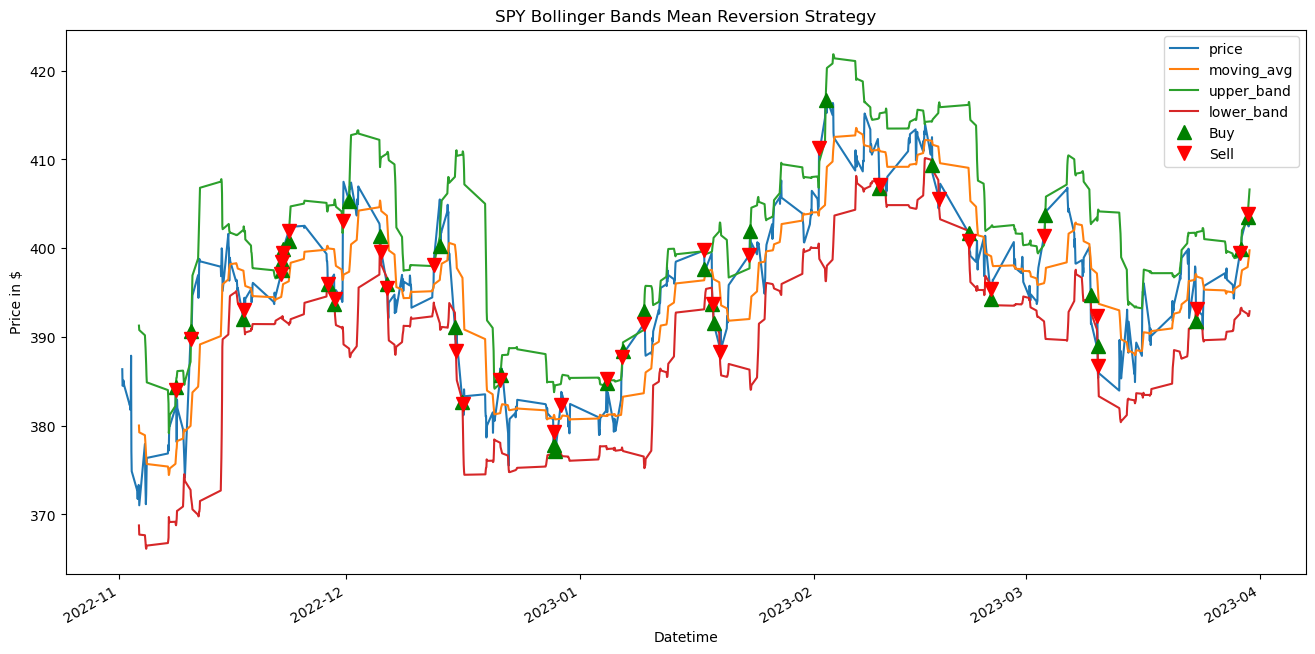

Final PnL: $484.66


In [120]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
from datetime import datetime, timedelta

# Function to download stock data
def download_data(ticker, start_date, end_date, interval='1h'):
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return stock_data

# Function to implement the Bollinger Bands mean reversion strategy
def bollinger_bands_mean_reversion(stock_data, window, num_std_dev):
    signals = pd.DataFrame(index=stock_data.index)
    signals['price'] = stock_data['Adj Close']
    signals['moving_avg'] = signals['price'].rolling(window=window).mean()
    signals['std_dev'] = signals['price'].rolling(window=window).std()
    signals['upper_band'] = signals['moving_avg'] + (signals['std_dev'] * num_std_dev)
    signals['lower_band'] = signals['moving_avg'] - (signals['std_dev'] * num_std_dev)
    signals['signal'] = 0.0
    signals['signal'] = np.where(signals['price'] < signals['lower_band'], 1.0, 0.0)
    signals['signal'] = np.where(signals['price'] > signals['upper_band'], -1.0, signals['signal'])
    signals['positions'] = signals['signal'].diff()
    return signals

# Function to plot the stock price and buy/sell signals
def plot_signals(signals, ticker):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(111, ylabel='Price in $')
    signals[['price', 'moving_avg', 'upper_band', 'lower_band']].plot(ax=ax1)
    ax1.plot(signals.loc[signals.positions == 1.0].index, signals.price[signals.positions == 1.0], '^', markersize=10, color='g', label='Buy')
    ax1.plot(signals.loc[signals.positions == -1.0].index, signals.price[signals.positions == -1.0], 'v', markersize=10, color='r', label='Sell')
    plt.title(f'{ticker} Bollinger Bands Mean Reversion Strategy')
    plt.legend(loc='best')
    plt.show()


# Function to calculate PnL and simulate trading
def calculate_pnl(signals, initial_investment, transaction_fee_per_share):
    # Calculate the difference in positions from the previous day
    signals['position_diff'] = signals['positions'].diff()

    # Calculate fees paid for each trade
    signals['fees'] = signals['position_diff'].abs() * transaction_fee_per_share

    # Calculate the value of positions held each day
    signals['holdings'] = signals['positions'] * signals['price']

    # Calculate the cash balance each day
    signals['cash'] = initial_investment - (signals['position_diff'] * signals['price'] + signals['fees']).cumsum()

    # Calculate the total value each day (cash + holdings)
    signals['total'] = signals['cash'] + signals['holdings']

    return signals


# Function to implement the Moving Average Crossover strategy
def moving_average_crossover(stock_data, short_window, long_window):
    signals = pd.DataFrame(index=stock_data.index)
    signals['price'] = stock_data['Adj Close']
    signals['short_mavg'] = signals['price'].rolling(window=short_window).mean()
    signals['long_mavg'] = signals['price'].rolling(window=long_window).mean()
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()
    return signals


# Function to implement the RSI strategy
def rsi_strategy(stock_data, rsi_window, rsi_buy_level, rsi_sell_level):
    signals = pd.DataFrame(index=stock_data.index)
    signals['price'] = stock_data['Adj Close']
    signals['rsi'] = talib.RSI(signals['price'], timeperiod=rsi_window)
    signals['signal'] = 0.0
    signals['signal'] = np.where(signals['rsi'] < rsi_buy_level, 1.0, 0.0)
    signals['signal'] = np.where(signals['rsi'] > rsi_sell_level, -1.0, signals['signal'])
    signals['positions'] = signals['signal'].diff()
    return signals

# Parameters
ticker = 'SPY'  # ETF symbol (e.g., SPY for S&P 500 ETF)
start_date = '2022-11-01'
end_date = '2023-03-31'
window = 20
num_std_dev = 2
initial_investment = 500
transaction_fee_per_share = 0.005

# Download stock data
stock_data = download_data(ticker, start_date, end_date)

# Implement Bollinger Bands mean reversion strategy
signals = bollinger_bands_mean_reversion(stock_data, window, num_std_dev)

# Calculate PnL and simulate trading
signals = calculate_pnl(signals, initial_investment, transaction_fee_per_share)

# Plot the stock price and buy/sell signals
plot_signals(signals, ticker)

# Print the final PnL
print(f"Final PnL: ${signals['total'][-1]:.2f}")

In [151]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
from datetime import datetime, timedelta

# Function to download stock data
def download_data(ticker, start_date, end_date, interval='1h'):
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return stock_data

# Function to implement the Bollinger Bands mean reversion strategy
def bollinger_bands_mean_reversion(stock_data, window, num_std_dev):
    signals = pd.DataFrame(index=stock_data.index)
    signals['price'] = stock_data['Adj Close']
    signals['moving_avg'] = signals['price'].rolling(window=window).mean()
    signals['std_dev'] = signals['price'].rolling(window=window).std()
    signals['upper_band'] = signals['moving_avg'] + (signals['std_dev'] * num_std_dev)
    signals['lower_band'] = signals['moving_avg'] - (signals['std_dev'] * num_std_dev)
    signals['signal'] = 0.0
    signals['signal'] = np.where(signals['price'] < signals['lower_band'], 1.0, 0.0)
    signals['signal'] = np.where(signals['price'] > signals['upper_band'], -1.0, signals['signal'])
    signals['positions'] = signals['signal'].diff()
    return signals

# Function to plot the stock price and buy/sell signals
def plot_signals(signals, ticker):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(111, ylabel='Price in $')
    signals[['price', 'moving_avg', 'upper_band', 'lower_band']].plot(ax=ax1)
    ax1.plot(signals.loc[signals.positions == 1.0].index, signals.price[signals.positions == 1.0], '^', markersize=10, color='g', label='Buy')
    ax1.plot(signals.loc[signals.positions == -1.0].index, signals.price[signals.positions == -1.0], 'v', markersize=10, color='r', label='Sell')
    plt.title(f'{ticker} Bollinger Bands Mean Reversion Strategy')
    plt.legend(loc='best')
    plt.show()

# Function to calculate PnL and simulate trading
def calculate_pnl(signals, initial_investment, transaction_fee_per_share):
    # Calculate the difference in positions from the previous day
    signals['position_diff'] = signals['positions'].diff()

    # Calculate fees paid for each trade
    signals['fees'] = signals['position_diff'].abs() * transaction_fee_per_share

    # Calculate the value of positions held each day
    signals['holdings'] = signals['positions'] * signals['price']

    # Calculate the cash balance each day
    signals['cash'] = initial_investment - (signals['position_diff'] * signals['price'] + signals['fees']).cumsum()

    # Calculate the total value each day (cash + holdings)
    signals['total'] = signals['cash'] + signals['holdings']

    return signals

# Parameters
ticker = 'SPY'  # ETF symbol (e.g., SPY for S&P 500 ETF)
start_date = '2022-11-01'
end_date = '2023-03-31'
window = 20
num_std_dev = 2
initial_investment = 500
transaction_fee_per_share = 0.005

# Download stock data
stock


NameError: name 'stock' is not defined

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
import concurrent.futures
from datetime import datetime, timedelta
from sklearn.model_selection import ParameterGrid

# Function to download stock data
def download_data(ticker, start_date, end_date, interval='1h'):
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval, progress=False)
    return stock_data

# Function to plot the stock price and buy/sell signals
def plot_signals(signals, ticker):
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(111, ylabel='Price in $')
    signals[['price', 'moving_avg', 'upper_band', 'lower_band']].plot(ax=ax1)
    ax1.plot(signals.loc[signals.positions == 1.0].index, signals.price[signals.positions == 1.0], '^', markersize=10, color='g', label='Buy')
    ax1.plot(signals.loc[signals.positions == -1.0].index, signals.price[signals.positions == -1.0], 'v', markersize=10, color='r', label='Sell')
    plt.title(f'{ticker} Bollinger Bands Mean Reversion Strategy')
    plt.legend(loc='best')
    plt.show()



# Function to implement the Bollinger Bands mean reversion strategy
def bollinger_bands_mean_reversion(stock_data, window, num_std_dev):
    signals = pd.DataFrame(index=stock_data.index)
    signals['price'] = stock_data['Adj Close']
    signals['moving_avg'] = signals['price'].rolling(window=window).mean()
    signals['std_dev'] = signals['price'].rolling(window=window).std()
    signals['upper_band'] = signals['moving_avg'] + (signals['std_dev'] * num_std_dev)
    signals['lower_band'] = signals['moving_avg'] - (signals['std_dev'] * num_std_dev)
    signals['signal'] = 0.0
    signals['signal'] = np.where(signals['price'] < signals['lower_band'], 1.0, 0.0)
    signals['signal'] = np.where(signals['price'] > signals['upper_band'], -1.0, signals['signal'])
    signals['positions'] = signals['signal'].diff()
    return signals

# Function to calculate PnL and simulate trading
def calculate_pnl(signals, initial_investment, transaction_fee_per_share):
    signals['position_diff'] = signals['positions'].diff()
    signals['fees'] = signals['position_diff'].abs() * transaction_fee_per_share
    signals['holdings'] = signals['positions'] * signals['price']
    signals['cash'] = initial_investment - (signals['position_diff'] * signals['price'] + signals['fees']).cumsum()
    signals['total'] = signals['cash'] + signals['holdings']
    return signals


def single_backtest(ticker, start_date, end_date, window, num_std_dev, initial_investment, transaction_fee_per_share):
    stock_data = download_data(ticker, start_date, end_date)
    
    if stock_data.empty:
        return 0, 0, 0
    
    signals = bollinger_bands_mean_reversion(stock_data, window, num_std_dev)
    signals = calculate_pnl(signals, initial_investment, transaction_fee_per_share)

    pnl = signals['total'][-1] - initial_investment
    profit_rate = pnl / initial_investment
    num_transactions = signals['positions'].abs().sum()

    return pnl, profit_rate, num_transactions

# Function to perform backtests using multithreading
def backtest_strategy(ticker, start_date, end_date, window, num_std_dev, initial_investment, transaction_fee_per_share, n=100):
    pnl_list = []
    profit_rate_list = []
    num_transactions_list = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(single_backtest, ticker, pd.to_datetime(start_date) - timedelta(days=i), pd.to_datetime(end_date) - timedelta(days=i), window, num_std_dev, initial_investment, transaction_fee_per_share) for i in range(n)]

        for future in concurrent.futures.as_completed(futures):
            pnl, profit_rate, num_transactions = future.result()
            pnl_list.append(pnl)
            profit_rate_list.append(profit_rate)
            num_transactions_list.append(num_transactions)

    mean_pnl = np.mean(pnl_list)
    mean_profit_rate = np.mean(profit_rate_list)
    mean_num_transactions = np.mean(num_transactions_list)

    return mean_pnl, mean_profit_rate, mean_num_transactions




In [2]:
# ML parameter tuning
def tune_parameters(ticker, start_date, end_date, initial_investment, transaction_fee_per_share, n=100):
    param_grid = {
        'window': list(range(10, 51, 5)),
        'num_std_dev': np.arange(1.5, 2.6, 0.1)
    }

    best_profit_rate = -np.inf
    best_params = None

    for params in ParameterGrid(param_grid):
        mean_pnl, mean_profit_rate, mean_num_transactions = backtest_strategy(ticker, start_date, end_date, params['window'], params['num_std_dev'], initial_investment, transaction_fee_per_share, n=n)
        
        if mean_profit_rate > best_profit_rate:
            best_profit_rate = mean_profit_rate
            best_params = params

    return best_params, best_profit_rate

In [3]:
# Parameters for tuning
ticker = 'SPY'
start_date = '2023-01-01'
end_date = '2023-04-15'
initial_investment = 500
transaction_fee_per_share = 0.005

# Tune parameters
best_params, best_profit_rate = tune_parameters(ticker, start_date, end_date, initial_investment, transaction_fee_per_share)
print(f"Best Parameters: {best_params}, Best Profit Rate: {best_profit_rate:.4f}")

# Implement the Bollinger Bands mean reversion strategy with the new parameters
def implement_strategy_with_new_params(ticker, start_date, end_date, best_params, initial_investment, transaction_fee_per_share):
    window = best_params['window']
    num_std_dev = best_params['num_std_dev']

    stock_data = download_data(ticker, start_date, end_date)
    signals = bollinger_bands_mean_reversion(stock_data, window, num_std_dev)
    signals = calculate_pnl(signals, initial_investment, transaction_fee_per_share)

    return signals

# Use the new parameters in the strategy
new_signals = implement_strategy_with_new_params(ticker, start_date, end_date, best_params, initial_investment, transaction_fee_per_share)

# Plot the stock price and buy/sell signals with new parameters
plot_signals(new_signals, ticker)

print(f"Final PnL with new parameters: ${new_signals['total'][-1]:.2f}")



1 Failed download:
1 Failed download:
- SPY: No data found for this date range, symbol may be delisted



1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted

1 Failed download:
- SPY: No data found for

KeyError: 'SPY'

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

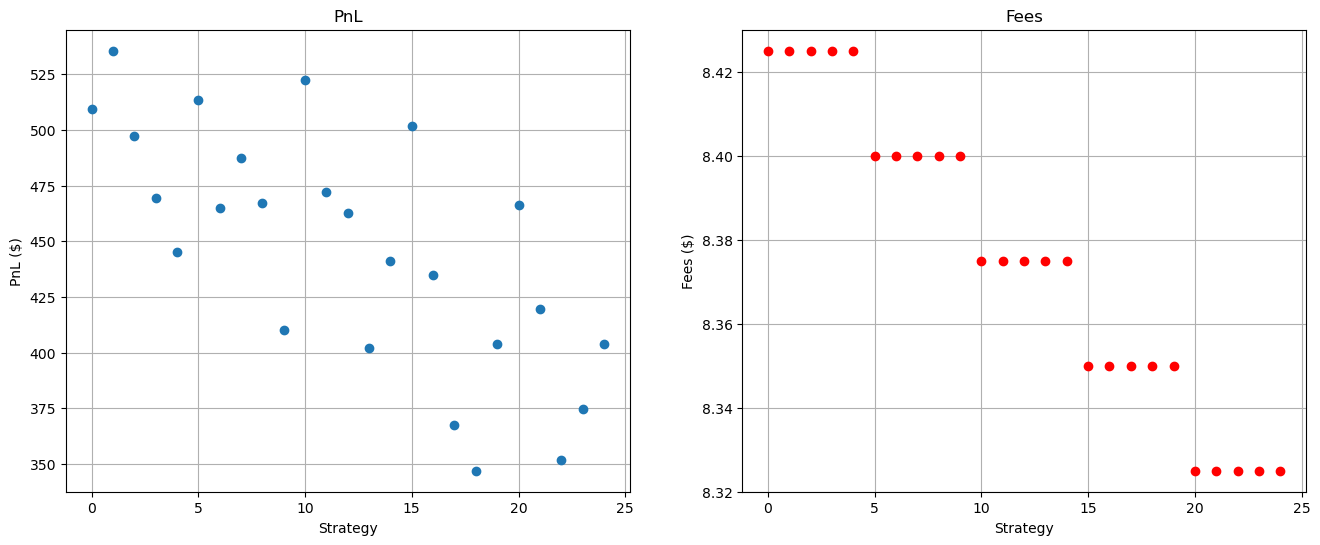

In [16]:
import itertools

# Function to implement moving average crossover strategy
def moving_average_crossover(stock_data, short_window, long_window):
    signals = pd.DataFrame(index=stock_data.index)
    signals['price'] = stock_data['Close']
    
    # Calculate moving averages
    signals['short_mavg'] = signals['price'].rolling(window=short_window, min_periods=1).mean()
    signals['long_mavg'] = signals['price'].rolling(window=long_window, min_periods=1).mean()

    # Create buy signals when short moving average crosses above long moving average
    signals['positions'] = np.where(signals['short_mavg'] > signals['long_mavg'], 1, 0)
    
    # Create sell signals when short moving average crosses below long moving average
    signals['positions'] = np.where(signals['short_mavg'] < signals['long_mavg'], -1, signals['positions'])

    return signals

# Function to run backtest for moving average crossover strategy
def run_moving_average_backtest(ticker, start_date, end_date, short_window, long_window, initial_investment, transaction_fee_per_share):
    stock_data = download_data(ticker, start_date, end_date)
    signals = moving_average_crossover(stock_data, short_window, long_window)
    signals = calculate_pnl(signals, initial_investment, transaction_fee_per_share)
    final_pnl = signals['total'][-1]
    total_fees = (abs(signals['positions']) * transaction_fee_per_share).sum()
    return final_pnl, total_fees

# Parameters for moving average crossover strategy
short_windows = range(5, 26, 5)  # 5, 10, 15, 20, 25
long_windows = range(30, 101, 15)  # 30, 45, 60, 75, 90

# Generate all combinations of short and long windows
window_pairs = list(itertools.product(short_windows, long_windows))

# Run backtests
ma_results = [run_moving_average_backtest(ticker, start_date, end_date, pair[0], pair[1], initial_investment, transaction_fee_per_share) for pair in window_pairs]

# Extract PnL and fees
ma_pnl_values = [result[0] for result in ma_results]
ma_fees_values = [result[1] for result in ma_results]

# Find the best strategy
best_strategy_index = ma_pnl_values.index(max(ma_pnl_values))
best_strategy = window_pairs[best_strategy_index]

print(f"Best strategy: Short window {best_strategy[0]} days, Long window {best_strategy[1]} days")

# Plot PnL and fees
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(ma_pnl_values, marker='o', linestyle='', label='PnL')
ax1.set_title('PnL')
ax1.set_xlabel('Strategy')
ax1.set_ylabel('PnL ($)')
ax1.grid()

ax2.plot(ma_fees_values, marker='o', linestyle='', color='r', label='Fees')
ax2.set_title('Fees')
ax2.set_xlabel('Strategy')
ax2.set_ylabel('Fees ($)')
ax2.grid()

plt.show()

In [17]:
# Function to implement dual moving average crossover strategy with RSI filter
def dual_mavg_crossover_rsi(stock_data, short_window, long_window, rsi_period, rsi_lower, rsi_upper):
    signals = pd.DataFrame(index=stock_data.index)
    signals['price'] = stock_data['Close']
    
    # Calculate moving averages
    signals['short_mavg'] = signals['price'].rolling(window=short_window, min_periods=1).mean()
    signals['long_mavg'] = signals['price'].rolling(window=long_window, min_periods=1).mean()
    
    # Calculate RSI
    delta = signals['price'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=rsi_period, min_periods=rsi_period).mean()
    avg_loss = loss.rolling(window=rsi_period, min_periods=rsi_period).mean()
    rs = avg_gain / avg_loss
    signals['rsi'] = 100 - (100 / (1 + rs))

    # Create signals
    signals['positions'] = np.where(signals['short_mavg'] > signals['long_mavg'], 1, 0)
    signals['positions'] = np.where(signals['short_mavg'] < signals['long_mavg'], -1, signals['positions'])
    
    # Apply RSI filter
    signals['positions'] = np.where(signals['rsi'] < rsi_lower, 1, signals['positions'])
    signals['positions'] = np.where(signals['rsi'] > rsi_upper, -1, signals['positions'])

    return signals

# Function to run backtest for dual moving average crossover strategy with RSI filter
def run_dual_mavg_rsi_backtest(ticker, start_date, end_date, short_window, long_window, rsi_period, rsi_lower, rsi_upper, initial_investment, transaction_fee_per_share):
    stock_data = download_data(ticker, start_date, end_date)
    signals = dual_mavg_crossover_rsi(stock_data, short_window, long_window, rsi_period, rsi_lower, rsi_upper)
    signals = calculate_pnl(signals, initial_investment, transaction_fee_per_share)
    final_pnl = signals['total'][-1]
    total_fees = (abs(signals['positions']) * transaction_fee_per_share).sum()
    return final_pnl, total_fees

# Backtest parameters
short_window = 10
long_window = 30
rsi_period = 14
rsi_lower = 30
rsi_upper = 70

# Run backtest
pnl, fees = run_dual_mavg_rsi_backtest(ticker, start_date, end_date, short_window, long_window, rsi_period, rsi_lower, rsi_upper, initial_investment, transaction_fee_per_share)
print(f"PnL: {pnl}, Fees: {fees}")


[*********************100%***********************]  1 of 1 completed
PnL: 512.059665527346, Fees: 8.399999999999999


In [21]:
# Import additional libraries
import talib

# Function to run backtest for custom strategies
def run_custom_strategy_backtest(ticker, start_date, end_date, initial_investment, transaction_fee_per_share):
    stock_data = download_data(ticker, start_date, end_date)
    
    # Add your custom strategy here
    # Example: Calculate RSI
    stock_data['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)
    
    # Generate signals based on your custom strategy
    signals = pd.DataFrame(index=stock_data.index)
    signals['price'] = stock_data['Close']
    
    # Example: RSI-based strategy
    signals['positions'] = np.where(stock_data['rsi'] < 30, 1, 0)  # Buy signal
    signals['positions'] = np.where(stock_data['rsi'] > 70, -1, signals['positions'])  # Sell signal
    
    # Calculate PnL and fees
    signals = calculate_pnl(signals, initial_investment, transaction_fee_per_share)
    final_pnl = signals['total'][-1]
    total_fees = (signals['positions'] * transaction_fee_per_share).sum()
    return final_pnl, total_fees

# Run backtest for your custom strategy
pnl, fees = run_custom_strategy_backtest(ticker, start_date, end_date, initial_investment, transaction_fee_per_share)
print(f"PnL: {pnl}, Fees: {fees}")



[*********************100%***********************]  1 of 1 completed
PnL: 510.1036425781256, Fees: -0.010000000000000009


### Clean code from here

dual_mavg_rsi: This strategy uses two moving averages and the Relative Strength Index (RSI). It generates a buy signal when the short moving average is greater than the long moving average, and the RSI is below 30. It generates a sell signal when the short moving average is less than the long moving average, and the RSI is above 70. This strategy tries to capture the trend while considering the overbought and oversold conditions.

ema_crossover_rsi: Similar to the dual moving average strategy, this strategy uses Exponential Moving Averages (EMA) and the RSI. A buy signal is generated when the short EMA is greater than the long EMA and the RSI is below 30. A sell signal is generated when the short EMA is less than the long EMA and the RSI is above 70. This strategy is more sensitive to recent price changes due to the exponential weighting.

bollinger_rsi: This strategy uses Bollinger Bands and RSI. A buy signal is generated when the price is below the lower Bollinger Band and the RSI is below 30. A sell signal is generated when the price is above the upper Bollinger Band and the RSI is above 70. Bollinger Bands are used to identify overbought and oversold conditions based on standard deviations from the moving average,while the RSI is used to measure the momentum of the price movement. This strategy combines the two indicators to identify potential entry and exit points based on both price volatility and momentum.

macd_crossover_rsi: This strategy uses Moving Average Convergence Divergence (MACD) and RSI. A buy signal is generated when the MACD line crosses above the signal line and the RSI is below 30. A sell signal is generated when the MACD line crosses below the signal line and the RSI is above 70. The MACD is a popular trend-following momentum indicator that shows the relationship between two moving averages of prices, while the RSI is used to identify overbought and oversold conditions. This strategy combines the MACD's trend-following capabilities with the RSI's momentum-based signals to generate potentially profitable trades.

bollinger_macd: This strategy combines Bollinger Bands and MACD. A buy signal is generated when the price is below the lower Bollinger Band, and the MACD line is above the signal line. A sell signal is generated when the price is above the upper Bollinger Band, and the MACD line is below the signal line. This strategy uses Bollinger Bands to identify overbought and oversold price conditions and combines them with the trend-following capabilities of the MACD indicator.

In the implementations provided above, each strategy uses the corresponding technical indicators to generate buy and sell signals. These signals are then used to calculate the position changes and the resulting PnL and fees based on the initial investment and transaction fees per share. The strategies are designed to capture different market conditions and behaviors, which may lead to varying performance outcomes when backtested over different time periods.

In [59]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
from datetime import datetime, timedelta

def fetch_stock_data(ticker, start_date, end_date, interval):
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return stock_data

def dual_mavg_rsi(stock_data):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0

    short_mavg = stock_data['Close'].rolling(window=40, min_periods=1, center=False).mean()
    long_mavg = stock_data['Close'].rolling(window=100, min_periods=1, center=False).mean()
    rsi = talib.RSI(stock_data['Close'], timeperiod=14)

    signals.loc[short_mavg > long_mavg, 'signal'] = np.where(
        rsi < 30, 1.0, 0.0
    )

    signals['positions'] = signals['signal'].diff()
    return signals


def ema_crossover_rsi(stock_data):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0

    signals['ema12'] = talib.EMA(stock_data['Close'], timeperiod=12)
    signals['ema26'] = talib.EMA(stock_data['Close'], timeperiod=26)
    signals['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)

    signals['signal'] = np.where(
        (signals['ema12'] > signals['ema26']) & (signals['rsi'] < 30), 1.0, 0.0
    )

    signals['positions'] = signals['signal'].diff()
    return signals


def bollinger_rsi(stock_data):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0

    signals['upper'], signals['middle'], signals['lower'] = talib.BBANDS(stock_data['Close'], timeperiod=20)
    signals['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)

    signals['signal'] = np.where(
        (stock_data['Close'] < signals['lower']) & (signals['rsi'] < 30), 1.0, 0.0
    )

    signals['positions'] = signals['signal'].diff()
    return signals


def macd_crossover_rsi(stock_data):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0

    signals['macd'], signals['macd_signal'], _ = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    signals['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)

    signals['signal'] = np.where(
        (signals['macd'] > signals['macd_signal']) & (signals['rsi'] < 30), 1.0, 0.0
    )

    signals['positions'] = signals['signal'].diff()
    return signals



def generate_signals(stock_data, strategy_name):
    signals = None

    if strategy_name == 'dual_mavg_rsi':
        signals = dual_mavg_rsi(stock_data)
    elif strategy_name == 'ema_crossover_rsi':
        signals = ema_crossover_rsi(stock_data)
    elif strategy_name == 'bollinger_rsi':
        signals = bollinger_rsi(stock_data)
    elif strategy_name == 'macd_crossover_rsi':
        signals = macd_crossover_rsi(stock_data)
    else:
        raise ValueError("Invalid strategy name")

    return signals

def calculate_pnl(signals, initial_investment, transaction_fee_per_share):
    if signals is None:
        # Return a DataFrame with zeros if signals is None
        return pd.DataFrame({'total': [0], 'positions': [0]})

    # Rest of the calculate_pnl function remains the same


def generate_random_dates(start_date, end_date, num_backtests):
    date_range = (end_date - start_date).days
    random_dates = [start_date + timedelta(days=random.randint(0, date_range)) for _ in range(num_backtests * 2)]
    date_pairs = [(min(random_dates[i], random_dates[i + 1]), max(random_dates[i], random_dates[i + 1])) for i in range(0, len(random_dates), 2)]
    return date_pairs

def run_custom_strategy_backtest(strategy_name, ticker, start_date, end_date, initial_investment, transaction_fee_per_share):
    stock_data = fetch_stock_data(ticker, start_date, end_date, '1d')
    stock_data['ema12'] = talib.EMA(stock_data['Close'], timeperiod=12)
    stock_data['ema26'] = talib.EMA(stock_data['Close'], timeperiod=26)
    stock_data['macd'], stock_data['macd_signal'], _ = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    stock_data['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)

    # Generate signals based on your custom strategy
    signals = generate_signals(stock_data, strategy_name)

    # Calculate PnL and fees
    signals = calculate_pnl(signals, initial_investment, transaction_fee_per_share)
    final_pnl = signals['total'][-1]
    total_fees = (signals['positions'] * transaction_fee_per_share).sum()

    return final_pnl, total_fees

In [60]:
ticker = 'SPY'
initial_investment = 500
transaction_fee_per_share = 0.01
num_backtests = 100

strategies = ['dual_mavg_rsi', 'ema_crossover_rsi', 'bollinger_rsi', 'macd_crossover_rsi', 'bollinger_macd']


In [61]:
# Parameters
ticker = 'SPY'
initial_investment = 500
transaction_fee_per_share = 0.01
num_backtests = 100

strategies = ['dual_mavg_rsi', 'ema_crossover_rsi', 'bollinger_rsi', 'macd_crossover_rsi']

for strategy in strategies:
    strategy_results = []

    # Run backtest 100 times
    date_pairs = generate_random_dates(datetime(2022, 5, 1), datetime.today(), num_backtests)
    for start_date, end_date in date_pairs:
        pnl, fees = run_custom_strategy_backtest(strategy, ticker, start_date, end_date, initial_investment, transaction_fee_per_share)
        strategy_results.append((pnl, fees))

    # Calculate mean and standard deviation of PnL and fees
    pnl_mean = np.mean([result[0] for result in strategy_results])
    pnl_std = np.std([result[0] for result in strategy_results])
    fees_mean = np.mean([result[1] for result in strategy_results])
    fees_std = np.std([result[1] for result in strategy_results])

    print(f"Strategy: {strategy}")
    print(f"Mean PnL: {pnl_mean:.2f}, Standard Deviation PnL: {pnl_std:.2f}")
    print(f"Mean Fees: {fees_mean:.2f}, Standard Deviation Fees: {fees_std:.2f}")
    print()


[*********************100%***********************]  1 of 1 completed


ValueError: shape mismatch: value array of shape (211,) could not be broadcast to indexing result of shape (100,)

In [ ]:
# Print the results
for strategy, strategy_results in zip(strategies, all_results):
    pnl_values = [result[0] for result in strategy_results]
    fees_values = [result[1] for result in strategy_results]
    
    pnl_mean = np.mean(pnl_values)
    pnl_std = np.std(pnl_values)
    fees_mean = np.mean(fees_values)
    fees_std = np.std(fees_values)
    
    print(f"Strategy: {strategy}")
    print(f"Mean PnL: {pnl_mean:.2f}, Standard Deviation PnL: {pnl_std:.2f}")
    print(f"Mean Fees: {fees_mean:.2f}, Standard Deviation Fees: {fees_std:.2f}")
    print()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

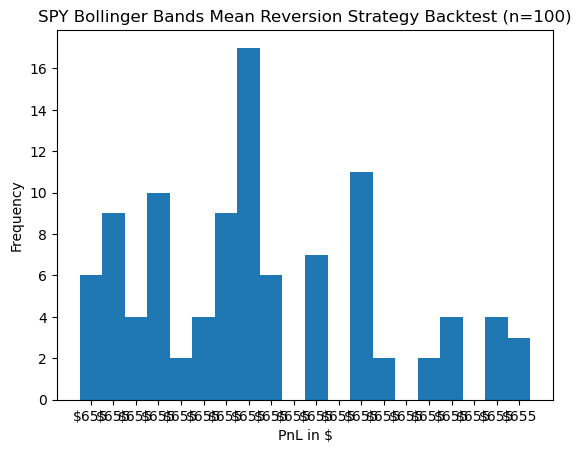

In [68]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
from datetime import datetime, timedelta

# Function to download stock data
def download_data(ticker, start_date, end_date, interval='1d'):
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return stock_data

# Function to implement the Bollinger Bands mean reversion strategy
def bollinger_bands_mean_reversion(stock_data, window, num_std_dev):
    signals = pd.DataFrame(index=stock_data.index)
    signals['price'] = stock_data['Adj Close']
    signals['moving_avg'] = signals['price'].rolling(window=window).mean()
    signals['std_dev'] = signals['price'].rolling(window=window).std()
    signals['upper_band'] = signals['moving_avg'] + (signals['std_dev'] * num_std_dev)
    signals['lower_band'] = signals['moving_avg'] - (signals['std_dev'] * num_std_dev)
    signals['signal'] = 0.0
    signals['signal'] = np.where(signals['price'] < signals['lower_band'], 1.0, 0.0)
    signals['signal'] = np.where(signals['price'] > signals['upper_band'], -1.0, signals['signal'])
    signals['positions'] = signals['signal'].diff()
    return signals

# Function to calculate PnL and simulate trading
def calculate_pnl(signals, initial_investment, transaction_fee_per_share):
    # Calculate the difference in positions from the previous day
    signals['position_diff'] = signals['positions'].diff()

    # Calculate fees paid for each trade
    signals['fees'] = signals['position_diff'].abs() * transaction_fee_per_share

    # Calculate the value of positions held each day
    signals['holdings'] = signals['positions'] * signals['price']

    # Calculate the cash balance each day
    signals['cash'] = initial_investment - (signals['position_diff'] * signals['price'] + signals['fees']).cumsum()

    # Calculate the total value each day (cash + holdings)
    signals['total'] = signals['cash'] + signals['holdings']

    return signals

# Function to run backtest
def backtest(ticker, start_date, end_date, window, num_std_dev, initial_investment, transaction_fee_per_share, num_simulations):
    pnl_list = []
    for i in range(num_simulations):
        # Download stock data
        stock_data = download_data(ticker, start_date, end_date)

        # Implement Bollinger Bands mean reversion strategy
        signals = bollinger_bands_mean_reversion(stock_data, window, num_std_dev)

        # Calculate PnL and simulate trading
        signals = calculate_pnl(signals, initial_investment, transaction_fee_per_share)

        # Append PnL to list
        pnl_list.append(signals['total'][-1])

    return pnl_list

# Parameters
ticker = 'SPY'  # ETF symbol (e.g., SPY for S&P 500 ETF)
start_date = '2019-01-01'
end_date = '2022-04-30'
window = 20
num_std_dev = 2
initial_investment = 500
transaction_fee_per_share = 0.005
num_simulations = 100

# Run backtest
pnl_list = backtest(ticker, start_date, end_date, window, num_std_dev, initial_investment, transaction_fee_per_share, num_simulations)

# Plot histogram of PnLs
fig, ax = plt.subplots()
n, bins, patches = ax.hist(pnl_list, bins=20)
ax.set_xlabel('PnL in $')
ax.set_ylabel('Frequency')
ax.set_title(f'{ticker} Bollinger Bands Mean Reversion Strategy Backtest (n={num_simulations})')

# Add x-axis tick labels
bin_centers = 0.5 * (bins[:-1] + bins[1:])
ax.set_xticks(bin_centers)
ax.set_xticklabels(['${:,.0f}'.format(x) for x in bin_centers])

plt.show()



In [94]:
import numpy as np
import pandas as pd
import yfinance as yf
import talib
import random
from datetime import datetime, timedelta

def fetch_stock_data(ticker, start_date, end_date, interval='1d'):
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
    return stock_data

def generate_random_dates(start_date, end_date, num_backtests):
    date_range = (end_date - start_date).days
    random_dates = [start_date + timedelta(days=random.randint(0, date_range)) for _ in range(num_backtests * 2)]
    date_pairs = [(min(random_dates[i], random_dates[i + 1]), max(random_dates[i], random_dates[i + 1])) for i in range(0, len(random_dates), 2)]
    return date_pairs

# Strategy functions
def dual_mavg_rsi(stock_data):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0

    signals['short_mavg'] = stock_data['Close'].rolling(window=40, min_periods=1, center=False).mean()
    signals['long_mavg'] = stock_data['Close'].rolling(window=100, min_periods=1, center=False).mean()
    signals['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)

    signals['signal'][100:] = np.where(
        (signals['short_mavg'][100:] > signals['long_mavg'][100:]) & (signals['rsi'][100:] < 30), 1.0, 0.0
    )

    signals['positions'] = signals['signal'].diff()
    return signals

def ema_crossover_rsi(stock_data):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0

    signals['ema12'] = talib.EMA(stock_data['Close'], timeperiod=12)
    signals['ema26'] = talib.EMA(stock_data['Close'], timeperiod=26)
    signals['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)

    signals['signal'] = np.where(
        (signals['ema12'] > signals['ema26']) & (signals['rsi'] < 30), 1.0, 0.0
    )

    signals['positions'] = signals['signal'].diff()
    return signals

def bollinger_rsi(stock_data):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0

    signals['upper'], signals['middle'], signals['lower'] = talib.BBANDS(stock_data['Close'], timeperiod=20)
    signals['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)

    signals['signal'] = np.where(
        (stock_data['Close'] < signals['lower']) & (signals['rsi'] < 30), 1.0, 0.0
    )

    signals['positions'] = signals['signal'].diff()
    return signals

def macd_crossover_rsi(stock_data):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0

    signals['macd'], signals['macd_signal'], _ = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    signals['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)

    signals['signal'] = np.where(
        (signals['macd'] > signals['macd_signal']) & (signals['rsi'] < 30), 1.0, 0.0
    )

    signals['positions'] = signals['signal'].diff()
    return signals

def bollinger_macd(stock_data):
    signals = pd.DataFrame(index=stock_data.index)
    signals['signal'] = 0.0

    signals['upper'], signals['middle'], signals['lower'] = talib.BBANDS(stock_data['Close'], timeperiod=20)
    signals['macd'], signals['macd_signal'], _ = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    signals['signal'] = np.where(
        (stock_data['Close'] < signals['lower']) & (signals['macd'] > signals['macd_signal']), 1.0, 0.0
    )

    signals['positions'] = signals['signal'].diff()
    return signals


def generate_signals(stock_data, strategy_name):
    if strategy_name == 'dual_mavg_rsi':
        signals = dual_mavg_rsi(stock_data)
    elif strategy_name == 'ema_crossover_rsi':
        signals = ema_crossover_rsi(stock_data)
    elif strategy_name == 'bollinger_rsi':
        signals = bollinger_rsi(stock_data)
    elif strategy_name == 'macd_crossover_rsi':
        signals = macd_crossover_rsi(stock_data)
    elif strategy_name == 'bollinger_macd':
        signals = bollinger_macd(stock_data)
    else:
        raise ValueError("Invalid strategy name")
    return signals

def calculate_pnl(stock_data, signals, initial_investment, transaction_fee_per_share):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions['AAPL'] = signals['positions'] * initial_investment

    # Calculate the fees
    pos_diff = positions['AAPL'].diff().abs()
    fees = pos_diff * transaction_fee_per_share

    # Calculate the total investment, including fees
    positions['total_investment'] = positions['AAPL'] + fees

    # Calculate the holding return
    positions['holding_return'] = (1 + stock_data['Close'].pct_change()) * positions['AAPL']
    positions['holding_return'].fillna(0, inplace=True)

    # Calculate the portfolio value
    portfolio = pd.DataFrame(index=positions.index)
    portfolio['AAPL'] = positions['holding_return'].cumsum()
    portfolio['total'] = portfolio['AAPL'] - fees.cumsum() + initial_investment

    return portfolio

def run_custom_strategy_backtest(strategy_name, ticker, start_date, end_date, initial_investment, transaction_fee_per_share):
    stock_data = fetch_stock_data(ticker, start_date, end_date, '1d')

    if stock_data.empty:  # Check if the stock_data DataFrame is empty
        print(f"No data available for {ticker} between {start_date} and {end_date}")
        return None, None  # Return None for both pnl and fees
    
    #print(stock_data)  # Add this line to print the stock_data DataFrame
    stock_data['ema12'] = talib.EMA(stock_data['Close'], timeperiod=12)
    stock_data['ema26'] = talib.EMA(stock_data['Close'], timeperiod=26)
    stock_data['macd'], stock_data['macd_signal'], _ = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    stock_data['rsi'] = talib.RSI(stock_data['Close'], timeperiod=14)

    # Generate signals based on your custom strategy
    signals = generate_signals(stock_data, strategy_name)

    # Calculate PnL and fees
    portfolio = calculate_pnl(stock_data, signals, initial_investment, transaction_fee_per_share)
    final_pnl = portfolio['total'][-1]
    total_fees = portfolio['fees'].sum()


    return final_pnl, total_fees

# Backtesting code
strategy = 'bollinger_macd'  # Replace this with your strategy name
ticker = 'AAPL'
initial_investment = 500
transaction_fee_per_share = 0.01
num_backtests = 100

strategy_results = []
date_pairs = generate_random_dates(datetime(2022, 5, 1), datetime(2022, 10, 15), num_backtests)

for start_date, end_date in date_pairs:
    pnl, fees = run_custom_strategy_backtest(strategy, ticker, start_date, end_date, initial_investment, transaction_fee_per_share)
    if pnl is not None and fees is not None:  # Add this check
        strategy_results.append((pnl, fees))

# Calculate mean and standard deviation of PnL and fees
pnl_mean = np.mean([result[0] for result in strategy_results])
pnl_std = np.std([result[0] for result in strategy_results])
fees_mean = np.mean([result[1] for result in strategy_results])

print(f"Mean PnL: {pnl_mean:.2f}")
print(f"PnL Standard Deviation: {pnl_std:.2f}")
print(f"Mean Fees: {fees_mean:.2f}")



[*********************100%***********************]  1 of 1 completed


KeyError: 'fees'

In [82]:
strategy_results = []
date_pairs = generate_random_dates(datetime(2022, 5, 1), datetime.today(), num_backtests)

for start_date, end_date in date_pairs:
    pnl, fees = run_custom_strategy_backtest(strategy, ticker, start_date, end_date, initial_investment, transaction_fee_per_share)
    strategy_results.append((pnl, fees))

# Calculate mean and standard deviation of PnL and fees
pnl_mean = np.mean([result[0] for result in strategy_results])
pnl_std = np.std([result[0] for result in strategy_results])
fees_mean = np.mean([result[1] for result in strategy_results])

print(f"Mean PnL: {pnl_mean:.2f}")
print(f"PnL Standard Deviation: {pnl_std:.2f}")
print(f"Mean Fees: {fees_mean:.2f}")


[*********************100%***********************]  1 of 1 completed


ValueError: Invalid strategy name

In [77]:
# Run backtest
num_backtests = 100
initial_investment = 500
transaction_fee_per_share = 0.01
ticker = "AAPL"
strategy = "bollinger_macd"

strategy_results = []

# Silence the yfinance progress bar
import warnings
warnings.filterwarnings("ignore")

date_pairs = generate_random_dates(datetime(2022, 5, 1), datetime.today(), num_backtests)
for start_date, end_date in date_pairs:
    pnl, fees = run_custom_strategy_backtest(strategy, ticker, start_date, end_date, initial_investment, transaction_fee_per_share)
    strategy_results.append((pnl, fees))

# Calculate mean and standard deviation of PnL and fees
pnl_mean = np.mean([result[0] for result in strategy_results])
pnl_std = np.std([result[0] for result in strategy_results])
fees_mean = np.mean([result[1] for result in strategy_results])
fees_std = np.std([result[1] for result in strategy_results])

print(f"Mean PnL: {pnl_mean:.2f}, Standard Deviation PnL: {pnl_std:.2f}")
print(f"Mean Fees: {fees_mean:.2f}, Standard Deviation Fees: {fees_std:.2f}")

[*********************100%***********************]  1 of 1 completed


ValueError: Invalid strategy name